In [1]:
# make the jupyter notebook interactive
%matplotlib widget

# BIOViewer demo

This demo walks you trough different features of the BIOViewer
1. Single module: How to construct a basic viewer
2. Multiwindow: How to build a viewer that displays multiple signals 
3. Transforms: How to apply transformations before the signal is displayed
4. All together: example of how to do it all together

# Single module

You first need to generate a configuration, which will then be turned into a viewer. 

the most basic information is:
- a numpy file
- channel names
- location for the channels 
- signal frequency

it allows you to scroll left and right trough the image

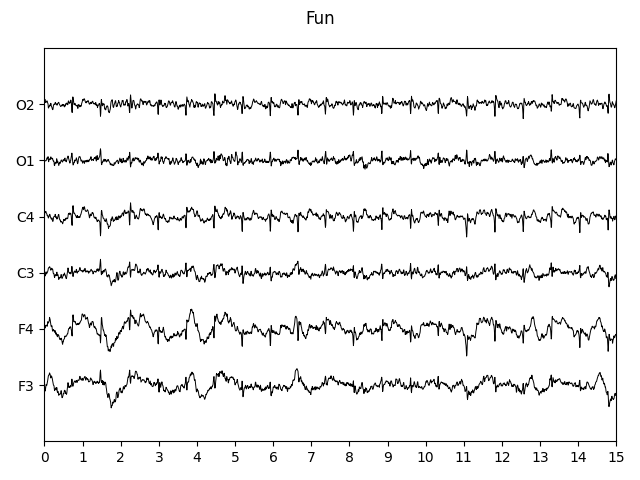

In [2]:
%matplotlib widget
from viewers import ContinuousViewer
from config import ContinuousConfig

path_signal = 'example.npy'
display_channels = ['F3', 'F4', 'C3', 'C4', 'O1', 'O2']
y_locations = [0,100,200,300,400,500]
Fs = 128

config = ContinuousConfig(path_signal,Fs,display_channels,y_locations, y_pad = 100)
viewer = ContinuousViewer(configs=[config])

In [3]:
viewer.t_start

30

# Multi window

this is where the BIOViewer shows most utility. \
You can build a multiwindow viewer! \
this is useful when ...
* parts of the signal are stored at different locations
* the signals have different frequencies
* you want to display the signal with different transformations applied


to show you how it works we are going to plot the same signal twice

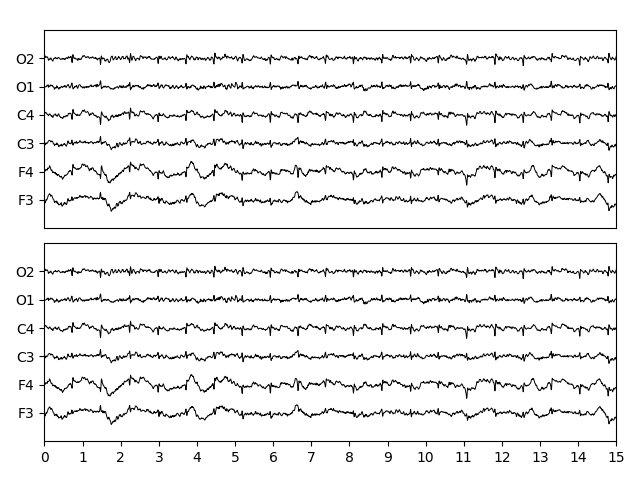

In [ ]:
# general information
path_signal = 'example.npy'
display_channels = ['F3', 'F4', 'C3', 'C4', 'O1', 'O2']
Fs = 128
title = 'Test'

config0 = ContinuousConfig(path_signal,Fs,display_channels,y_locations = [0,100,200,300,400,500],y_pad=100,t_ticks=False)
config1 = ContinuousConfig(path_signal,Fs,display_channels,y_locations = [0,100,200,300,400,500], y_pad = 100)
ContinuousViewer(configs=[config0,config1])
ContinuousConfig()

# Transformations
in many cases we want to apply functions to the signal before it is displayed. 

this is done via transformations.
In the example below we have a 6 channel signal and want to different channels of it in different windows


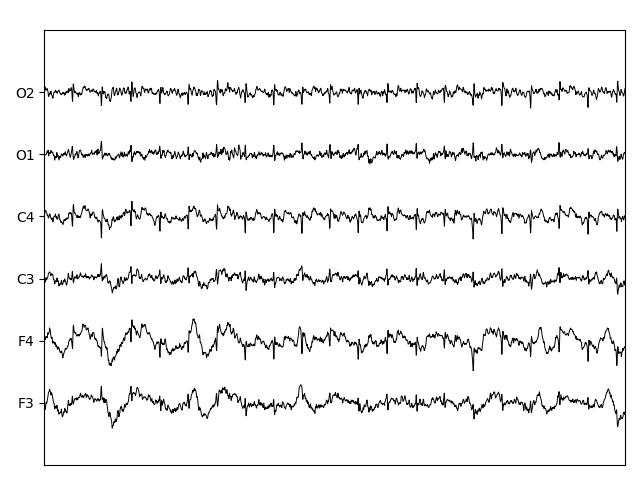

In [ ]:
from BIOViewer.transforms import FilterChannels
# general information
path_signal = 'example.npy'
# define the order in which the channels are present in the original file
storage_channels = ['F3', 'F4', 'C3', 'C4', 'O1', 'O2']
Fs = 128

# define the channels that are supposed to be displayed
display_channels = ['F3','F4']
# filter out the channels that should not be displayed
filter = FilterChannels(storage_channels,display_channels)
# build the config file using the filter as a transformation
# note that the number of displaychannels matches the number of y_locations
config = ContinuousConfig(path_signal,Fs,display_channels,y_locations=[0,100],transforms = filter, y_pad = 100)

ContinuousViewer(configs=[config0])

# All together
here you can see how to build a viewer with multiple windows, with a different transformation applied to each window

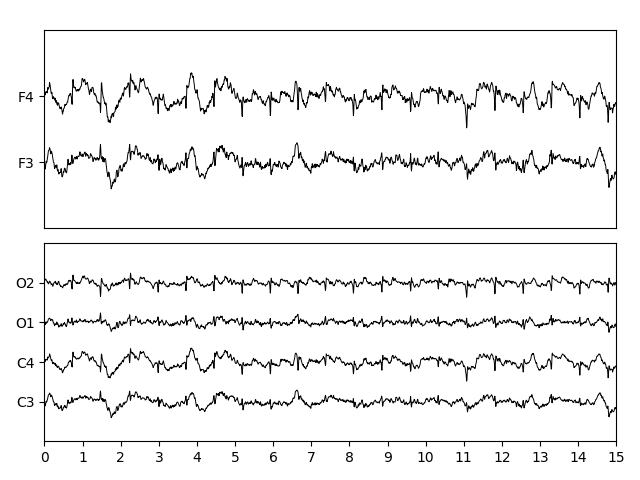

In [ ]:
from BIOViewer.transforms import FilterChannels
# general information
path_signal = 'example.npy'
# define the order in which the channels are present in the original file
storage_channels = ['F3', 'F4', 'C3', 'C4', 'O1', 'O2']
Fs = 128
title = 'Test'

# define the channels that are supposed to be displayed
display_channels_0 = ['F3','F4']
display_channels_1 = ['C3','C4','O1','O2']
# filter out the channels that should not be displayed
filter0 = FilterChannels(storage_channels,display_channels_0)
filter1 = FilterChannels(storage_channels,display_channels_1)
# build the config file using the filter as a transformation
# note that the number of displaychannels matches the number of y_locations
config0 = ContinuousConfig(path_signal,Fs,display_channels_0,y_locations=[0,100],transforms = filter0, y_pad = 100,t_ticks=False)
config1 = ContinuousConfig(path_signal,Fs,display_channels_1,y_locations=[0,100,200,300],transforms = filter1, y_pad = 100)
ContinuousViewer(configs=[config0,config1])
ContinuousConfig()